# **Analyzing Superstore Sales Dataset with Pivot Tables and Visualizations**

### Dataset Description:
The dataset typically contains the following columns:
- **Order Date**: Date of the order.
- **Category**: Product category (e.g., Furniture, Technology, Office Supplies).
- **Sub-Category**: Sub-categories within categories (e.g., Chairs, Phones).
- **Region**: Sales regions (e.g., East, West).
- **Sales**: Total sales amount.
- **Profit**: Profit for the transaction.
- **Quantity**: Quantity sold.

### Steps for Analysis:

1. **Load the Superstore dataset into a pandas DataFrame** (downloadable from Kaggle).
   
   - Inspect the dataset:
     - Display the first 5 rows of the dataset.
     - Check for missing or null values and handle them appropriately.

   - Create new columns if required:
     - Extract **Year** and **Month** from the Order Date column.

2. **Create Pivot Tables** for the following analyses:
   - **Sales by category and region**: Sum of sales for each category and region.
   - **Profit by sub-category (Top 10 profitable sub-categories)**: Find the sub-categories with the highest profit.
   - **Profit margin by region and category**: Profit margin calculated as Profit/Sales for each region and category.
   - **Quantity sold by category over time**: Monthly or yearly trends showing how much quantity of each category was sold.
   - **Proportion of sales contributed by each category**: Percentage contribution of each category to total sales.

3. **Create Insightful Graphs using Pivot Tables**:
   - Visualize **Sales by category and region**.
   - Visualize **Profit by sub-category**, showcasing the **Top 10 profitable sub-categories**.
   - Visualize **Profit margin** by **region and category**.
   - Visualize **Quantity sold by category over time**.
   - Visualize the **Proportion of sales** contributed by each category.

4. **Customize Visualizations**:
   - Add titles, axis labels, legends, and gridlines.
   - Use appropriate color schemes for better readability.

### Answer the following questions using Pivot Tables:

1. **Which region had the highest total sales?**

2. **Which sub-category generated the most profit?**

3. **Is there a region or category with negative profit? If so, which one?**

4. **What is the sales trend (increasing or decreasing) for the top-performing category over time?**

This will allow you to get an overview of key sales trends and insights across categories, regions, and sub-categories of the Superstore dataset.


# Import Libraries


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# DATA IMPORT AND PREPROCESSING

In [ ]:
df=pd.read_csv('Global_Superstore(CSV).csv')

In [ ]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High


#  Statistics Summary


In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


#CREATING A REPORT FOR OVERVIEW

Observation = 806 null values in postal code

In [ ]:
report1=pd.DataFrame(df.dtypes)
report1['Missing values']=df.isnull().sum()
report1["Unique values"]=df.nunique()
report1["Count"]=df.count()
report1=report1.rename(columns={0:'Index'})


report1

,Index,Missing values,Unique values,Count
Row ID,int64,0,1000,1000
Order ID,object,0,867,1000
Order Date,object,0,599,1000
Ship Date,object,0,613,1000
Ship Mode,object,0,4,1000
Customer ID,object,0,800,1000
Customer Name,object,0,496,1000
Segment,object,0,3,1000
Postal Code,float64,806,76,194
City,object,0,592,1000


In [ ]:
# Drop the 'Postal Code' column
df = df.drop('Postal Code', axis=1)

# Now we dont have any null values

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [ ]:
# Parse dates  yyyy-mm-dd


df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])



df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High


# Check duplicates

In [ ]:
df.duplicated().sum()

0

#Check Zero Values

In [ ]:
print("count of zero values")
print(df.isin([0]).sum())

count of zero values
Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount          560
Profit             10
Shipping Cost       0
Order Priority      0
dtype: int64


In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical


# Time-based Aggregation

In [ ]:
# Create new columns for Year and Month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
# Slice the last 6 columns #just to see if the year and month columns were added
#df.loc[row_indexer, column_indexer]            (label based)     (want to give row name ana column name)
#df.iloc[row_positioner, column_positioner]    (position based)
last_six_columns = df.iloc[:, -6:]
last_six_columns

,Discount,Profit,Shipping Cost,Order Priority,Year,Month
0,0.00,62.15,40.770,High,2014,11
1,0.10,-288.77,923.630,Critical,2014,2
2,0.10,919.97,915.490,Medium,2014,10
3,0.10,-96.54,910.160,Medium,2014,1
4,0.00,311.52,903.040,Critical,2014,11
...,...,...,...,...,...,...
995,0.30,-821.96,203.260,Medium,2015,4
996,0.00,20.84,12.040,High,2015,12
997,0.00,286.50,203.200,Critical,2014,10
998,0.00,110.00,203.132,Medium,2014,1


# Pivot Table
 Efficient Summarization: Pivot tables allow you to quickly summarize large datasets by performing aggregations like sum, average, count, etc., across different dimensions such as categories, regions, and time.



# 1.Sales by Category and Region


# Observation
## Observations for Sales by Category and Region

### 1. Highest Overall Sales by Category:
- **Technology** has the highest total sales among all categories, amounting to **₹756,983.02**.
- **Furniture** is the second-highest, with **₹601,492.31**.
- **Office Supplies** has the lowest total sales at **₹352,496.14**.

---

### 2. Total Sales Across All Regions:
- The total sales across all regions and categories sum up to **₹1,710,971.47**.

---

### 3. Regional Contribution:
- The highest contributing region overall is **Western Europe**, with total sales of **₹259,576.28**, driven mainly by Technology sales (**₹131,438.97**) and Furniture sales (**₹80,991.02**).
- **Southern Asia** also has significant sales, totaling **₹205,466.26**, led by Technology (**₹92,330.00**) and Furniture (**₹82,296.17**).

---

### 4. Category Performance by Region:
- **Technology** has the highest sales in **Eastern Asia (₹87,204.54)** and **Western Europe (₹131,438.97)**, showcasing strong regional demand for tech products.
- **Furniture** sales are notably high in **Eastern Asia (₹76,786.81)** and **Western Europe (₹80,991.02)**.
- **Office Supplies** perform best in **Western Europe (₹47,146.29)** and **Southern Europe (₹40,863.61)**.

---

### 5. Underperforming Regions:
- Some regions show significantly lower sales, such as **Central US (₹17,187.94)** and **Southern US (₹8,360.75)**.

---

### 6. Notable Insights per Category:
- **Technology**: Extremely strong sales in developed regions like **Western Europe**, **Eastern Asia**, and **Southern Asia**.
- **Furniture**: Shows more balanced sales across a mix of developed and developing regions, with a peak in **Western Europe**.
- **Office Supplies**: Highest sales are in **Western Europe**, but sales are much lower in African and some American regions.

---



In [ ]:
#  1: Sales by Category and Region
# - `margins=True`: This adds a total row and column to the pivot table for both categories and regions.
# - `margins_name='Total'`: This specifies the name of the total row and column. The default name is 'All'.
sales_category_region = pd.pivot_table(df,
                                        values='Sales',
                                        index='Category',
                                        columns='Region',
                                        aggfunc='sum',
                                        margins=True,
                                        margins_name='Total')
print("\nSales by Category and Region:")
print(sales_category_region)


Sales by Category and Region:
Region           Canada  Caribbean  Central Africa  Central America  \
Category                                                              
Furniture           NaN   12935.22        13578.48         43213.84   
Office Supplies  887.01    7971.20         3129.48         25707.02   
Technology          NaN    9840.32        17102.52         72045.35   
Total            887.01   30746.74        33810.48        140966.21   

Region           Central US  Eastern Africa  Eastern Asia  Eastern Europe  \
Category                                                                    
Furniture           2085.15         3989.16      76786.81        20589.99   
Office Supplies    12231.04         4819.98      29599.25         8371.44   
Technology          2871.75         8578.80      87204.54        16700.76   
Total              17187.94        17387.94     193590.60        45662.19   

Region           Eastern US  North Africa  ...  Southeastern Asia  \
Category  

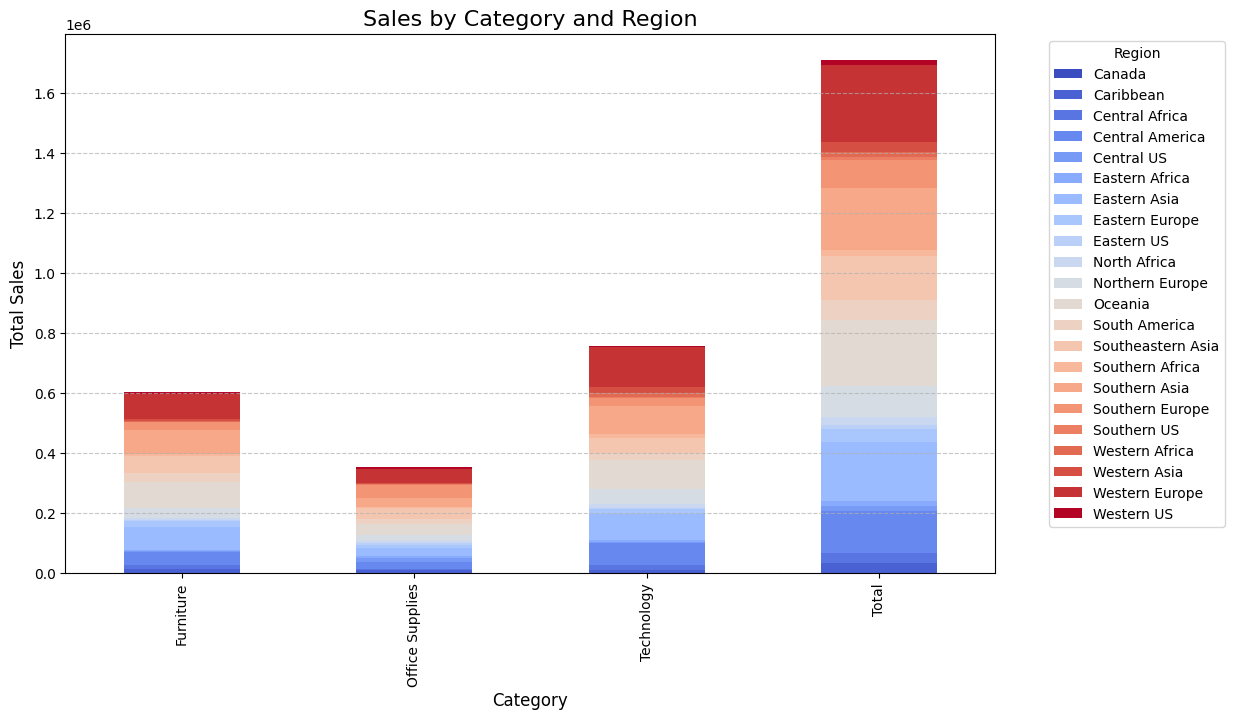

In [ ]:
#A stacked bar chart shows two categorical variables
# Creating a stacked bar chart to show the proportion of each region's sales
sales_category_region.drop('Total', axis=1).plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
plt.title("Sales by Category and Region", fontsize=16)
plt.ylabel("Total Sales", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# - `bbox_to_anchor` in the legend: This helps to place the legend outside the chart area (on the right-hand side).
# - `plt.grid(...)`: Adding horizontal grid lines with dashed lines and adjusting opacity for a cleaner look.

# 2.Top 10 Profitable Sub-Categories

#Observation

## Observations for Top 10 Profitable Sub-Categories

### 1. Most Profitable Sub-Category:
- **Phones** is the most profitable sub-category with a profit of **₹75,119.47**, reflecting strong customer demand and potential high margins.

---

### 2. High Profit in Technology Products:
- **Copiers (₹52,315.19)** and **Appliances (₹48,518.99)** secure the second and third spots, highlighting the profitability of technology-related products.

---

### 3. Furniture Contributions:
- **Bookcases (₹45,483.14)** and **Chairs (₹23,245.88)** represent furniture’s significant profitability, indicating consistent demand across regions for these items.

---

### 4. Balanced Profits Across Office Supplies:
- **Binders (₹7,435.09)** and **Storage (₹4,490.04)** feature in the top 10, demonstrating that even lower-value office supplies can be profitable through volume sales.

---

### 5. Medium Profit Sub-Categories:
- **Tables (₹13,051.69)** and **Machines (₹8,992.06)** show moderate profitability but still make it into the top 10.

---

### 6. Accessories and Peripheral Products:
- **Accessories** yield **₹8,641.96**, showcasing the profitability of add-on products for technology or office supplies.

---

### 7. Profit Variation:
- A significant drop in profitability


In [ ]:
# - `df.groupby('Sub-Category')`: Groups the dataset by 'Sub-Category', so we can calculate the profit for each.
# - `['Profit'].sum()`: Sums up the 'Profit' values within each sub-category.
# - `sort_values(ascending=False)`: Sorts the summed profits in descending order, so the highest profits appear first.
profit_subcategory = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Profitable Sub-Categories:")
print(profit_subcategory)


Top 10 Profitable Sub-Categories:
Sub-Category
Phones         75119.47
Copiers        52315.19
Appliances     48518.99
Bookcases      45483.14
Chairs         23245.88
Tables         13051.69
Machines        8992.06
Accessories     8641.96
Binders         7435.09
Storage         4490.04
Name: Profit, dtype: float64


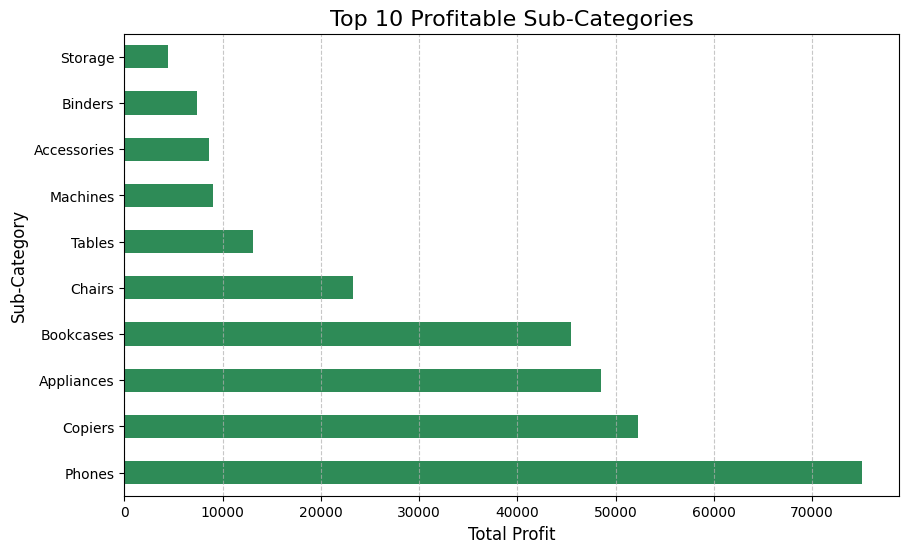

In [ ]:
# Create a """""horizontal bar""""" chart
profit_subcategory.plot(kind='barh', color='seagreen', figsize=(10, 6))
plt.title("Top 10 Profitable Sub-Categories", fontsize=16)
plt.xlabel("Total Profit", fontsize=12)
plt.ylabel("Sub-Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Horizontal grid lines with dashed style and transparency of 70%
plt.show()

# 3: Quantity Sold by Category Over Time


## Observations for Quantity Sold by Category Over Time

### 1. Peak Months:
- **Furniture**:
  - The highest quantity was sold in **November (210 units)** and **December (206 units)**.
- **Office Supplies**:
  - Peak sales occurred in **December (212 units)** and **November (195 units)**.
- **Technology**:
  - December is the standout month, with **325 units sold**, followed by **November (277 units)**.

### 2. Consistently Strong Periods:
- All categories show stronger sales in the last quarter (**October-December**), indicating high demand during this period, possibly due to seasonal events or holidays.
- Mid-year months like **June** and **August-September** also experience noticeable sales spikes:
  - **June**:
    - Furniture: 172
    - Office Supplies: 169
    - Technology: 234
  - **August-September**:
    - Furniture: 171, 184
    - Office Supplies: 136, 155
    - Technology: 253, 251

### 3. Fluctuations:
- **Office Supplies**:
  - Lowest sales in **July (63 units)** and highest in **December**.
- **Technology**:
  - Consistently shows an upward trend as the year progresses, peaking in **Q4**.
- **Furniture**:
  - More variability, with low points in **April (95 units)** and **July (92 units)**.

### 4. Category Comparisons:
- **Technology**:
  - Outperforms Furniture and Office Supplies, particularly in the last quarter.
- **Furniture**:
  - Typically sells more units than Office Supplies for most months, except in **December** when Office Supplies surpasses Furniture slightly.

---


In [ ]:
# - `values='Quantity'`: We're interested in the 'Quantity' column values to calculate total sales for each combination of Month and Category.
# - `index='Month'`: We're setting 'Month' as the index to see the time trends.
# - `columns='Category'`: Columns will be populated by 'Category', allowing us to see trends for each category.
# - `aggfunc='sum'`: We're aggregating the data by summing up 'Quantity' values for each category and month combination.
quantity_trends = pd.pivot_table(df,
                                  values='Quantity',
                                  index='Month',
                                  columns='Category',
                                  aggfunc='sum')
print("\nQuantity Sold by Category Over Time:")
print(quantity_trends)


Quantity Sold by Category Over Time:
Category  Furniture  Office Supplies  Technology
Month                                           
1               124               96         123
2               108               67          87
3               133               91          82
4                95              105         109
5               130               88         216
6               172              169         234
7                92               63         127
8               171              136         253
9               184              155         251
10              157               78         237
11              210              195         277
12              206              212         325


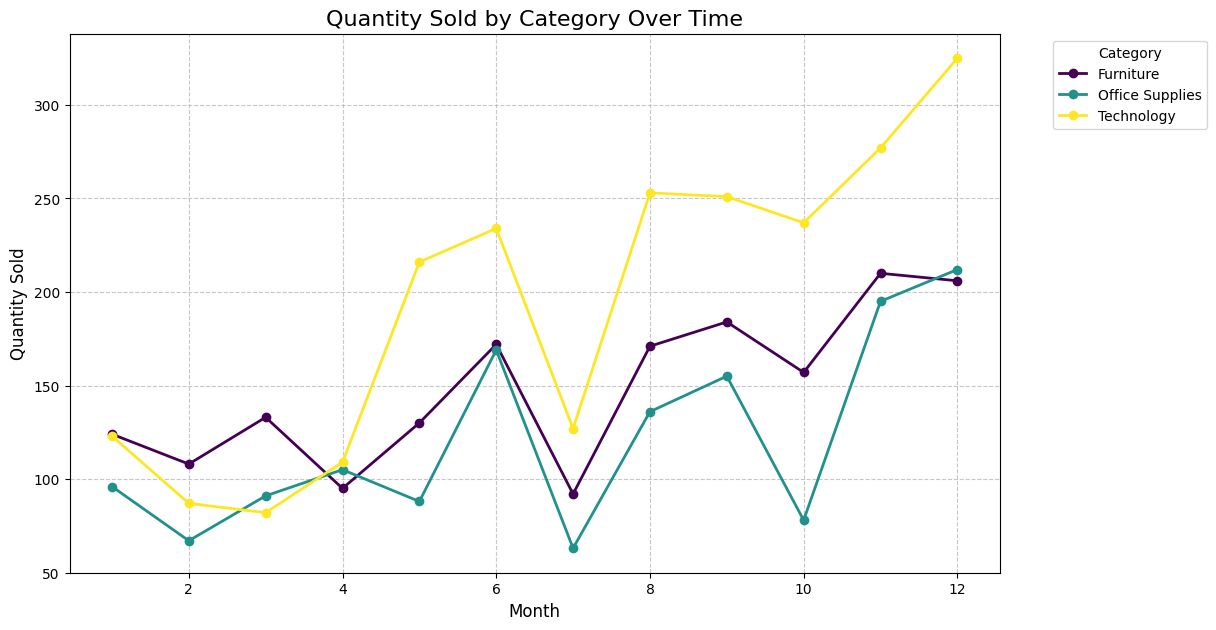

In [ ]:
# Plotting a line chart for quantity sold by category over time
# - `marker='o'`: Each data point will be marked with a circle ('o') for visual clarity.
# - `linewidth=2`: Sets the thickness of the lines in the chart to 2 (for a bolder look).
# - `plt.grid()`: Adds gridlines to both axes (both X and Y) to make the chart easier to read.
# - `plt.legend()`: The legend shows what each line represents and is placed outside the main plot to avoid overlap.
quantity_trends.plot(kind='line', figsize=(12, 7), marker='o', linewidth=2, colormap='viridis')
plt.title("Quantity Sold by Category Over Time", fontsize=16)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

#Customizing the legend (to show categories and place it outside the chart on the right)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4.Proportion of Sales by Category
## Proportion of Sales by Category

### 1. **Proportion of Sales**:
- **Furniture**: Accounts for **35.16%** of the total sales, making it the second-largest contributor.
- **Office Supplies**: Represents **20.60%** of total sales, the smallest share among the categories.
- **Technology**: The largest contributor, with **44.24%** of total sales, highlighting its dominant presence in the market.

---

### Recommendations:
- **Focus on Technology**: As the largest contributor, consider prioritizing marketing and inventory strategies that support the growth of technology-related products.
- **Optimize Furniture**: While still significant, finding ways to increase Furniture sales could help improve its proportion of the overall sales.
- **Enhance Office Supplies**: While Office Supplies contribute the least, exploring targeted campaigns or bundling offers could help improve their share in the market.


In [ ]:
# Grouping the dataset by 'Category' and calculating the total sales for each category
sales_category = df.groupby('Category')['Sales'].sum()

# Calculating the proportion of sales for each category by dividing the category sales by total sales, then multiplying by 100

proportion_sales_category = (sales_category / sales_category.sum()) * 100
print("\nProportion of Sales by Category:")
print(proportion_sales_category)
sales_category


Proportion of Sales by Category:
Category
Furniture          35.155017
Office Supplies    20.602105
Technology         44.242878
Name: Sales, dtype: float64


,Sales
Category,
Furniture,601492.31
Office Supplies,352496.14
Technology,756983.02


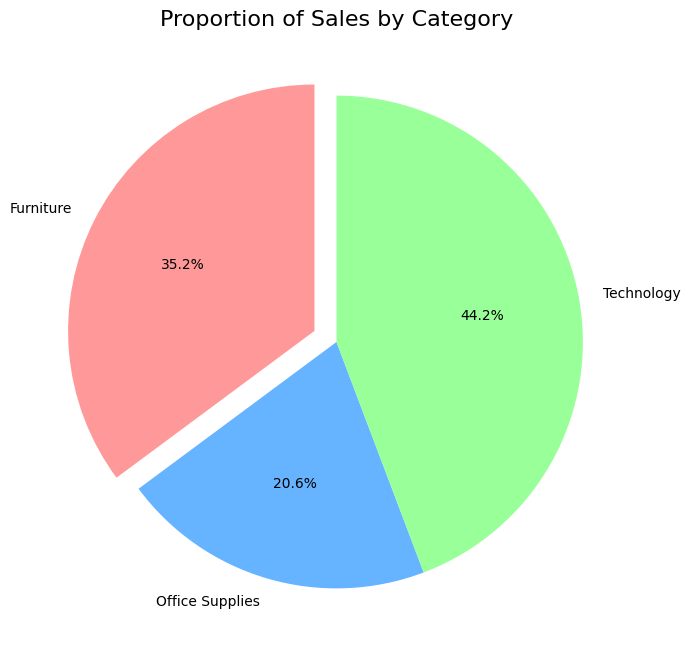

In [ ]:
# - `kind='pie'`: Tells matplotlib to plot a pie chart.
# - `autopct='%1.1f%%'`: Displays the percentage for each slice of the pie with one decimal place.
# - `startangle=90`: The first slice of the pie starts from the top (90 degrees).
# - `colors=['#ff9999','#66b3ff','#99ff99']`: Customizes the colors for each pie slice (soft tones for different categories).
# - `explode=(0.1, 0, 0)`: "Explodes" the first slice (makes it stand out slightly from the rest).
proportion_sales_category.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['#ff9999','#66b3ff','#99ff99'], explode=(0.1, 0, 0))
plt.title("Proportion of Sales by Category", fontsize=16)
plt.ylabel("")
plt.show()

# Region with the highest total sales
## Region with the Highest Total Sales

### 1. **Western Europe**:
- **Sales Total**: **₹259,576.28**
- This region has the highest total sales, primarily driven by **Technology** (**₹131,438.97**) and **Furniture** (**₹80,991.02**).

---

### Recommendations:
- **Strengthen Presence in Western Europe**: Given the strong sales, ensure ample inventory and targeted marketing efforts for high-performing categories like **Technology** and **Furniture** in this region.
- **Expand Reach in Other Regions**: While Western Europe performs well, consider strategies to boost sales in other underperforming regions.


In [ ]:
# - `df.groupby('Region')['Sales'].sum()`: Groups the data by 'Region' and sums the 'Sales' for each region.
# - `region_sales.idxmax()`: Returns the region with the highest total sales.
# - `region_sales.max()`: Returns the highest total sales value in that region.
region_sales = df.groupby('Region')['Sales'].sum()
print("\nRegion with the highest total sales:")

# idxmax() gives the region with the highest sales, max() gives the value

print(region_sales.idxmax(), "-", region_sales.max())


Region with the highest total sales:
Western Europe - 259576.28


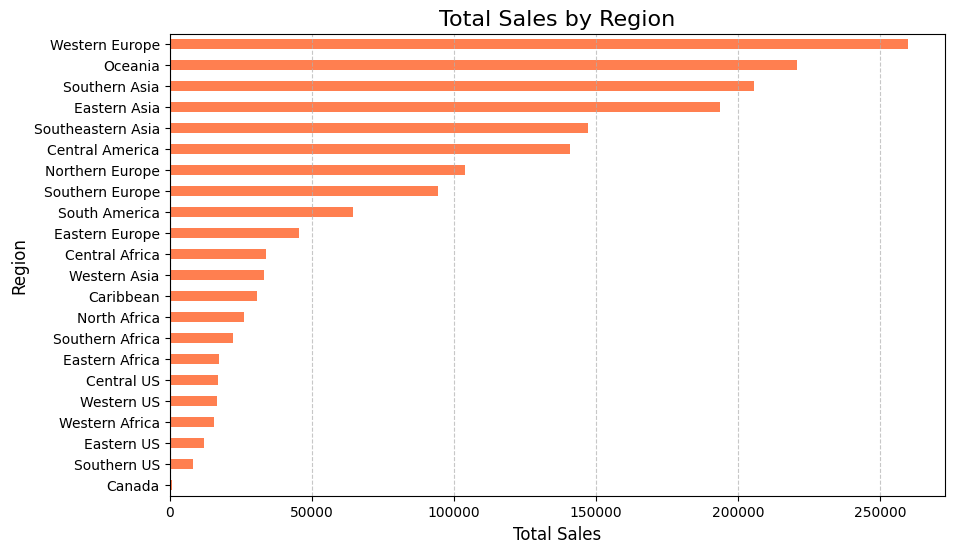

In [ ]:
# Visualization for Region Sales
# - `sort_values()`: Sorts the sales data in ascending order for better visualization.
# - `kind='barh'`: Creates a horizontal bar chart.
# - `color='coral'`: Sets the bars' color to 'coral'.
# - `figsize=(10, 6)`: Adjusts the size of the plot for clarity (10 inches wide, 6 inches tall).
# - `plt.grid()`: Adds horizontal gridlines to make it easier to read the sales values.
region_sales.sort_values().plot(kind='barh', color='coral', figsize=(10, 6))
plt.title("Total Sales by Region", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Sub-Category with the most profit

#Observation
## Sub-Category with the Most Profit

### 1. **Phones**:
- **Profit**: **₹75,119.47**
- **Phones** lead as the most profitable sub-category, reflecting strong customer demand and potentially high margins.

---

### Recommendations:
- **Focus on High-Profit Items**: Given the significant profitability of **Phones**, prioritize marketing and resource allocation toward this sub-category to maximize profits.
- **Product Bundling**: Consider bundling **Phones** with accessories or related products to enhance sales and further boost profitability.



In [ ]:
# - `df.groupby('Sub-Category')['Profit'].sum()`: Groups the data by 'Sub-Category' and sums the 'Profit' for each sub-category.
# - `subcategory_profit.idxmax()`: Returns the sub-category with the highest total profit.
# - `subcategory_profit.max()`: Returns the highest total profit value for that sub-category.
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum()
print("\nSub-Category with the most profit:")
print(subcategory_profit.idxmax(), "-", subcategory_profit.max())


Sub-Category with the most profit:
Phones - 75119.47


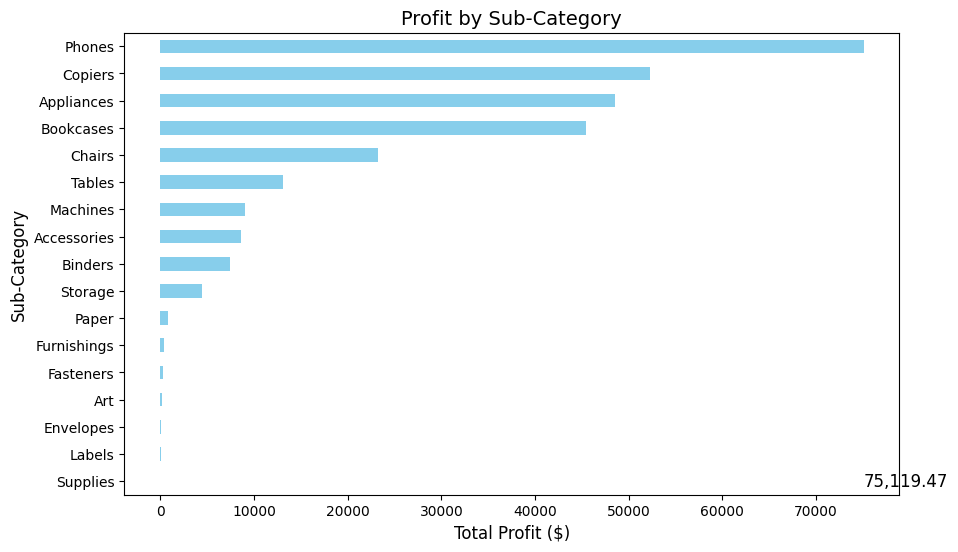

In [ ]:
# - `kind='barh'`: Creates a horizontal bar chart.
# - `color='skyblue'`: Sets the color of the bars to 'skyblue'.
# - `plt.text()`: Places the total profit value next to the bar representing the sub-category with the most profit.
# - `f"{subcategory_profit.max():,.2f}"`: Formats the highest profit value with two decimal points and thousands separator for readability.
# - `va="center"`: Aligns the text in the center vertically to make sure it is properly aligned with the bar.


plt.figure(figsize=(10,6))
subcategory_profit.sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Highlight the bar with the most profit
plt.text(subcategory_profit.max(), 0, f"{subcategory_profit.max():,.2f}", color="black", fontsize=12, va="center")

# Adding labels and title
plt.title('Profit by Sub-Category', fontsize=14)
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)

# Show the plot
plt.show()


# Regions or Categories with negative profit

# Observations

## Regions or Categories with Negative Profit

### **1. Caribbean:**
- **Technology**: Profit of **-₹688.58**

### **2. Central America:**
- **Furniture**: Profit of **-₹521.04**
- **Office Supplies**: Profit of **-₹690.54**
- **Technology**: Profit of **-₹2.12**

### **3. Central US:**
- **Furniture**: Profit of **-₹108.09**
- **Office Supplies**: Profit of **-₹143.61**
- **Technology**: Profit of **-₹270.84**

### **4. Eastern Asia:**
- **Furniture**: Profit of **-₹3,175.08**
- **Office Supplies**: Profit of **-₹1,086.41**
- **Technology**: Profit of **-₹286.92**

### **5. Eastern US:**
- **Furniture**: Profit of **-₹198.09**
- **Office Supplies**: Profit of **-₹464.63**

### **6. Northern Europe:**
- **Furniture**: Profit of **-₹2,750.28**
- **Office Supplies**: Profit of **-₹776.38**
- **Technology**: Profit of **-₹1,276.81**

### **7. Oceania:**
- **Furniture**: Profit of **-₹6,250.22**
- **Office Supplies**: Profit of **-₹558.02**
- **Technology**: Profit of **-₹356.34**

### **8. South America:**
- **Furniture**: Profit of **-₹1,445.05**
- **Technology**: Profit of **-₹1,806.24**

### **9. Southeastern Asia:**
- **Furniture**: Profit of **-₹3,007.93**
- **Office Supplies**: Profit of **-₹1,290.83**
- **Technology**: Profit of **-₹1,346.95**

### **10. Southern Asia:**
- **Office Supplies**: Profit of **-₹3,645.36**
- **Technology**: Profit of **-₹3,467.63**

### **11. Southern Europe:**
- **Office Supplies**: Profit of **-₹3,387.26**
- **Technology**: Profit of **-₹1,897.56**

### **12. Southern US:**
- **Furniture**: Profit of **-₹35.36**
- **Office Supplies**: Profit of **-₹407.37**
- **Technology**: Profit of **-₹27.83**

### **13. Western Africa:**
- **Furniture**: Profit of **-₹1,558.15**

### **14. Western Asia:**
- **Furniture**: Profit of **-₹1,452.28**
- **Technology**: Profit of **-₹1,331.65**

### **15. Western Europe:**
- **Furniture**: Profit of **-₹7,619.89**
- **Office Supplies**: Profit of **-₹2,019.82**
- **Technology**: Profit of **-₹5,478.01**

### **16. Western US:**
- **Furniture**: Profit of **-₹574.05**
- **Office Supplies**: Profit of **-₹105.34**
- **Technology**: Profit of **-₹18.55**

---

### Recommendations:
- **Analyze Underperforming Regions**: A significant number of regions and categories are showing negative profits. Deep dive into sales strategies and customer behavior in these areas could reveal the causes and help formulate corrective actions.
- **Focus on Loss Mitigation**: For regions with consistent losses like **Western Europe**, **Oceania**, and **Southern Asia**, evaluate the pricing, marketing, and distribution strategies to address profitability issues.
- **Product or Service Adjustment**: Some categories are repeatedly underperforming (like **Furniture** and **Technology**) across various regions. Consider adjusting offerings based on local preferences or improving operational efficiency.


In [ ]:
# Explanation:
# - `df[df['Profit'] < 0]`: Filters the dataframe to include only rows where 'Profit' is negative.
# - `groupby(['Region', 'Category'])`: Groups the filtered data by both 'Region' and 'Category'.
# - `['Profit'].sum()`: Summing the negative profits in each group (by region and category).
negative_profit = df[df['Profit'] < 0].groupby(['Region', 'Category'])['Profit'].sum()
print("\nRegions or Categories with Negative Profit:")
print(negative_profit)


Regions or Categories with Negative Profit:
Region             Category       
Caribbean          Technology         -688.58
Central America    Furniture          -521.04
                   Office Supplies    -690.54
                   Technology           -2.12
Central US         Furniture          -108.09
                   Office Supplies    -143.61
                   Technology         -270.84
Eastern Asia       Furniture         -3175.08
                   Office Supplies   -1086.41
                   Technology         -286.92
Eastern US         Furniture          -198.09
                   Office Supplies    -464.63
Northern Europe    Furniture         -2750.28
                   Office Supplies    -776.38
                   Technology        -1276.81
Oceania            Furniture         -6250.22
                   Office Supplies    -558.02
                   Technology         -356.34
South America      Furniture         -1445.05
                   Technology        -1806.24



1. **negative_profit:**
   - This is a DataFrame that contains the profits where the value is negative, grouped by regions and categories.

2. **.empty:**
   - `.empty` is an attribute of the DataFrame that checks if it is empty.
   - If `.empty` is `True`, the DataFrame has no data (no rows or columns).
   - If `.empty` is `False`, the DataFrame contains data (i.e., it has rows/columns).

3. **Checking `negative_profit.empty`:**
   - `if negative_profit.empty:` checks if the DataFrame `negative_profit` is empty (has no data).
   - `if not negative_profit.empty:` checks if the DataFrame is not empty (contains data). The `not` operator reverses the result of `.empty`, so if the DataFrame contains data (negative profits), the code block inside this condition will execute.

### Summary:
- `if negative_profit.empty:` runs when no regions or categories have negative profit (empty DataFrame).
- `if not negative_profit.empty:` runs when there are regions or categories with negative profit (non-empty DataFrame).

This logic helps to determine whether there are negative profits and proceed accordingly with further analysis or operations.


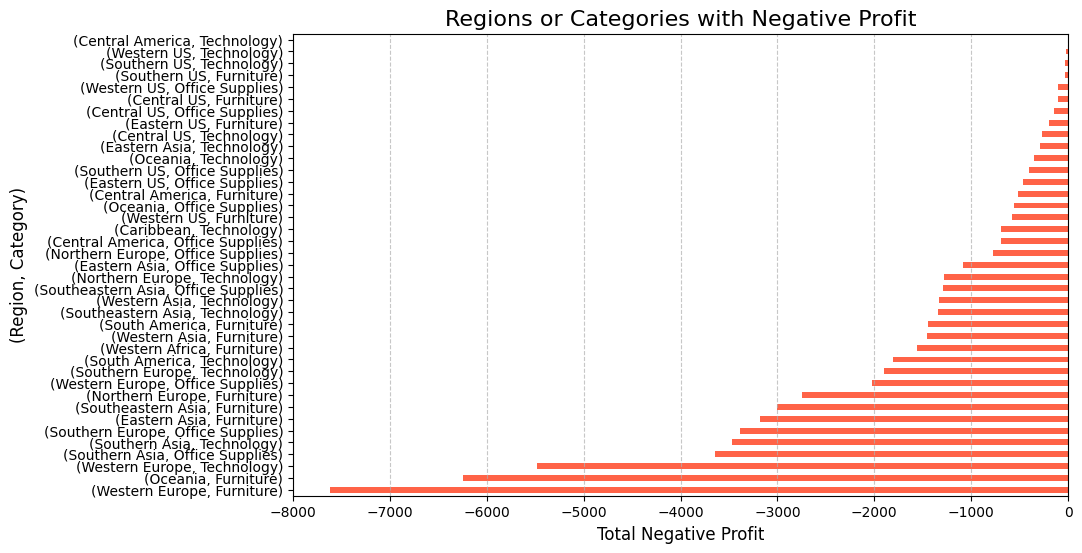

In [ ]:
if not negative_profit.empty:
    negative_profit.sort_values().plot(kind='barh', color='tomato', figsize=(10, 6))
    plt.title("Regions or Categories with Negative Profit", fontsize=16)
    plt.xlabel("Total Negative Profit", fontsize=12)
    plt.ylabel("(Region, Category)", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Sales trend for the top-performing category over time

# Key Observations for the Technology Sales Trend:

1. **Fluctuating Sales:**
   The sales for Technology products show significant fluctuations from month to month, with noticeable peaks in August and December each year. This indicates seasonal demand or promotional periods that contribute to higher sales during these months.

2. **Consistent Growth:**
   Over the years, especially from 2012 to 2015, there is a general upward trend in the overall sales numbers for Technology, indicating growth in this category.

3. **Key High-Performance Months:**
   Specific months, like August and December, stand out as having higher sales values each year. This could be attributed to special deals, year-end purchases, or market trends that boost demand.

4. **Lower-Performing Months:**
   On the other hand, months such as March, April, and February have noticeably lower sales numbers, pointing to possible seasonal downturns, or these months may require more marketing attention to boost sales.

5. **Yearly Sales Patterns:**
   The sales for Technology products peaked in 2014 and remained high in 2015, marking the category as one of the most steadily growing products over the observed period.

### Conclusion:
The sales data for Technology shows an overall positive trend, with spikes in certain months and steady growth. Further marketing and promotions in lower-performing months could help balance sales throughout the year.


Top Category by Total Sales: Technology


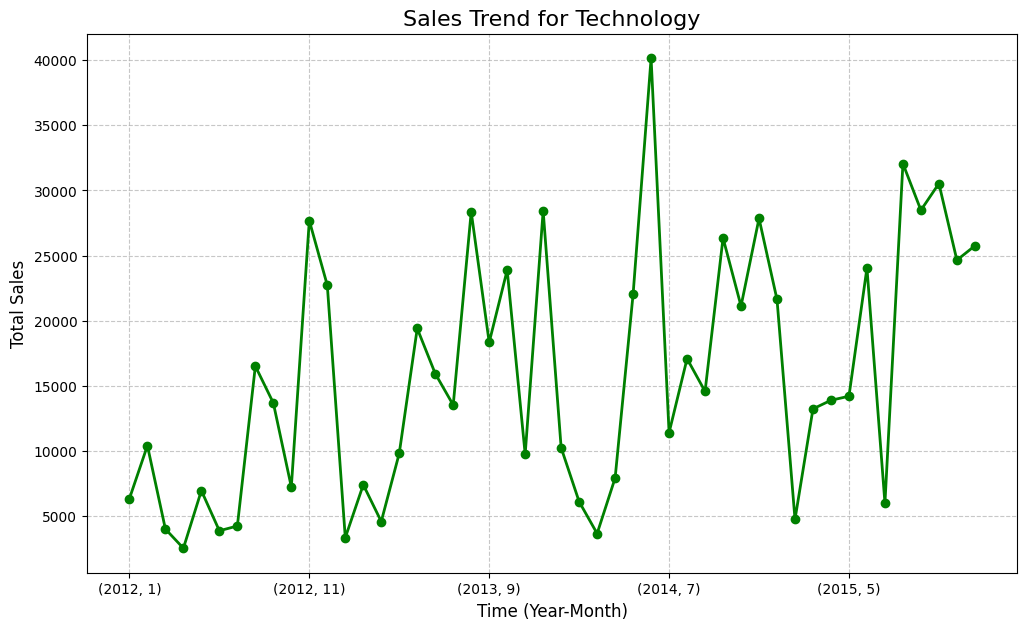


Sales Trend Data for Technology
    Year  Month     Sales
0   2012      1   6351.38
1   2012      2  10417.74
2   2012      3   4015.92
3   2012      4   2544.60
4   2012      5   6966.71
5   2012      6   3885.07
6   2012      7   4249.89
7   2012      8  16519.45
8   2012      9  13691.66
9   2012     10   7242.69
10  2012     11  27684.43
11  2012     12  22724.36
12  2013      1   3351.50
13  2013      2   7415.76
14  2013      3   4591.70
15  2013      4   9826.87
16  2013      5  19410.17
17  2013      6  15947.60
18  2013      7  13532.74
19  2013      8  28357.71
20  2013      9  18341.56
21  2013     10  23889.48
22  2013     11   9753.29
23  2013     12  28435.98
24  2014      1  10255.09
25  2014      2   6118.24
26  2014      3   3671.39
27  2014      4   7930.42
28  2014      5  22039.87
29  2014      6  40146.53
30  2014      7  11408.13
31  2014      8  17089.73
32  2014      9  14579.07
33  2014     10  26352.89
34  2014     11  21126.28
35  2014     12  27852.59
36  2

In [ ]:

# Finding the category with the highest total sales
top_category = sales_category.idxmax()

# Print the top category's name for output visibility
print(f"Top Category by Total Sales: {top_category}")

# Filter data for the top category and compute the sales trend over time
sales_trend = df[df['Category'] == top_category].groupby(['Year', 'Month'])['Sales'].sum()

# Filtering the dataframe to include data only for the top category
# Then grouping by year and month to compute total sales over time
sales_trend.plot(kind='line', figsize=(12, 7), marker='o', linewidth=2, color='green')

# Plotting the sales trend over time for the top category
plt.title(f"Sales Trend for {top_category}", fontsize=16)
plt.ylabel("Total Sales", fontsize=12)
plt.xlabel("Time (Year-Month)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Displaying the sales trend data for the top category in a readable format
sales_trend_output = sales_trend.reset_index()
print("\nSales Trend Data for", top_category)
print(sales_trend_output)
